In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [47]:
class Const:
    def __init__(self):
        self.n_animals = 100
        self.n_steps = 200
        self.vmin = 0.01
        self.vmax = 0.05
        self.trap_size = 0.4 # All critters with x<this and y<this will be considred "captured"
        self.trap_location = 'corner'
        self.death_rate = 0.01

In [1]:
def model(c, show_dotses=False, n_trials=1):
    history = np.zeros((c.n_steps,n_trials))

    for i_trials in range(n_trials):
        x = np.random.uniform(size=c.n_animals)
        y = np.random.uniform(size=c.n_animals)
        vx = np.random.uniform(size=c.n_animals, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals,low=0,high=2) - 1)
        vy = np.random.uniform(size=c.n_animals, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals,low=0,high=2) - 1)

        # Capture
        if c.trap_location=='corner':
            color = np.where(np.logical_and(x<c.trap_size , y<c.trap_size), 1, 0) # All captured are color1, all free ones are color0
        else:
            color = np.where(np.logical_and((x<0.5+c.trap_size/2)*(x>0.5+c.trap_size/2)*(
                y<0.5+c.trap_size/2)(y>0.5+c.trap_size/2), 1, 0)
        
        n_marked = np.sum(color)
                             
        estimation = np.zeros(c.n_steps) # At every point in time
                                    # .. we'll remember the estimation for N an ecologist could have made 

        if show_dotses: # Plotting
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111)
            plt.xlim((0,1));
            plt.ylim((0,1));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            # Moving elks around
            x += vx
            y += vy

            vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
            vy = np.where(np.logical_or(y>1,y<0), -vy , vy)

            is_replaced = np.random.uniform(size=c.n_animals)<c.death_rate
            color[is_replaced] = 0
                             
            # Recapture
            if c.trap_location=='corner':
                is_inside = (x<c.trap.size)*(y<c.trap_size)
            else:
                is_inside = color = (x<0.5+c.trap_size/2)*(x>0.5+c.trap_size/2)*(y<0.5+c.trap_size/2)(y>0.5+c.trap_size/2)
            
            n_recaptured_total = np.sum(is_inside)
            n_recaptured_marked = np.sum(is_inside*color) # Condition1 AND cond2 AND color==1
            estimation[t] = (n_marked+1)/(n_recaptured_marked+1)*(n_recaptured_total)-1 # Chapman estimator

            if show_dotses:
                ax.clear()
                plt.plot(x[color==0], y[color==0], 'k.',markersize=5);
                plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
                plt.xlim((0,1));
                plt.ylim((0,1));
                fig.canvas.draw() # <--------------- The main command to make it move
                #time.sleep(0.5)
                             
        history[:,i_trials] = estimation
    return np.mean(history,axis=1)

SyntaxError: invalid syntax (<ipython-input-1-06a72667dfb3>, line 19)

<IPython.core.display.Javascript object>


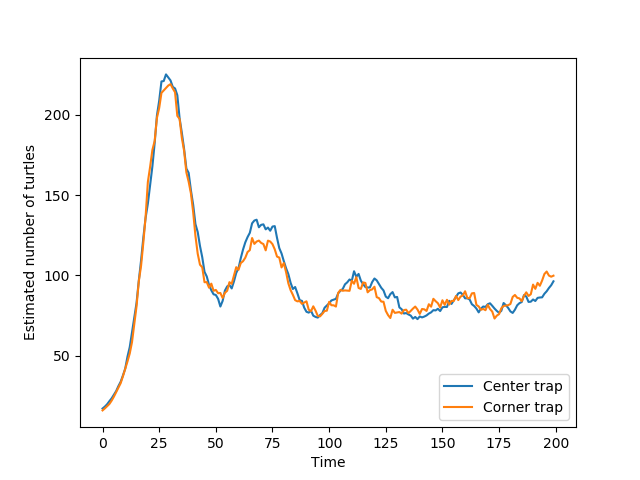

In [53]:
c = Const()
curve1 = model(c,n_trials=100)
c.tap_location = 'center'
curve2 = model(c,n_trials=100)
c.tap_location = 'corner'

plt.figure()
plt.plot(curve1, label='Center trap');
plt.plot(curve2, label='Corner trap')
plt.xlabel('Time');
plt.ylabel('Estimated number of turtles');
plt.legend(loc='lower right');
    

<IPython.core.display.Javascript object>


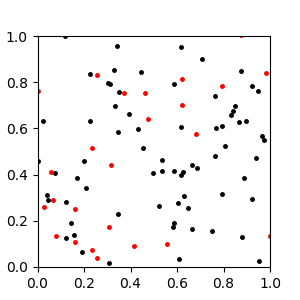

In [37]:
model(c,show_dotses=True);